## Using `Family Info` and the summary statistics CSV file

This notebook is intended to be a very simple demonstration of how you could use the information stored in the `FamilyInfo` class to analyze the summary  a related subset of runs. 

The dictionaries in FamilyInfo subdivide the runs into families (described in the SummaryInfo notebook and in the cadence report PTSN-051). They also provide information on each family and specify the most-likely useful comparison run. 

Let's have a look at what's going on in the `pair_times` family:

In [1]:
# Some useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The FamilyInfo class provides dictionaries containing lists of the simulations in a given run, as well as comparison runs that are most likely the best to use for a given family. With these lists of simulations in each family, it's easier to isolate those metric results to compare the effect of varying that survey strategy. 

In [2]:
# Import our family dictionaries/comments 
import run_infos as ri

families = ri.FamilyInfo()

Read the summary stat csv file into `families`.

These are the standard MAF summary stats (which may include something you use!) 
but you could join your own dataframe, as long as it covered all the relevant runs.
This gives us metric results to compare between the runs.

This summary stat file and future updates can be downloaded at<br>
https://github.com/lsst-pst/survey_strategy/blob/master/fbs_1.7/all_summaries_2021_02_09.csv

In [3]:
families.read_summary_csv(csv_file='all_summaries_2021_02_09.csv')

### Basic family information

In [4]:
# Choose our family to investigate
f = 'pair_times'

Calling `families.family_info(<family name>)` prints some basic information on the family and the name of the default comparison run for the family. 

It also returns a small subset of metrics relating to the area covered and number of visits per pointing in the simulation
* the amount of area with >825 visits -- roughly equivalent to the WFD area
* the amount of area with low dust extinction (E(B-v) < 0.2), somewhat deep coadded depth (i>25.9) and coverage in all six filters
* Median Nvisits per pointing over the 'best' 18K sq deg (i.e. number of visits per pointing in the WFD)
* Median number of visits per pointing per band in *u*, *g*, *r*, *i*, *z*, *y* bands
* A super-brief text description of the run

In [5]:
# Print a high-level description of the family and the name of the comparison run.
# Also returns a dataframe containing some basic information on the area and number of visits per pointing.
areaVisits = families.family_info(f)

**pair_times** = these simulations explore the impact of varying the time between pairs of visits in a night. Varying the pair time changes the overall number of filter changes per night, so longer pair times result in more visits overall in the survey. Longer pair times are more vulnerable to interruption however, resulting in a lower fraction of visits occuring in pairs. This family is related to the intranight family, but is from v1.7 so must be considered separately. The standard baseline attempts pairs at 22 minutes.

Comparison run: pair_times_22_v1.7_10yrs


In [6]:
# The dataframe 'areaVisits' returned from family_info contains some information 
# on the area and number of visits per pointing in the survey
areaVisits

,Area with >825 visits/pointing,Unextincted area i>25.9,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
pair_times_11_v1.7_10yrs,14356.957095,15118.196431,845.0,51.0,74.0,180.0,181.0,162.0,173.0,11 minute pairs
pair_times_22_v1.7_10yrs,17982.705642,15174.429105,888.0,55.0,79.0,189.0,190.0,170.0,180.0,22 minute pairs (baseline)
pair_times_33_v1.7_10yrs,18076.706531,15145.893121,902.0,57.0,80.0,192.0,192.0,172.0,182.0,33 minute pairs
pair_times_44_v1.7_10yrs,18104.403221,15112.321376,909.0,59.0,81.0,193.0,194.0,173.0,183.0,44 minute pairs
pair_times_55_v1.7_10yrs,18108.599689,15072.874574,913.0,59.0,82.0,194.0,194.0,173.0,183.0,55 minute pairs


### Initial area and nvisits check 
It's never a bad idea to check for changes in the survey area or number of visits per pointing or shifts in the filter balance as these are some of the primary causes of differences in science metrics. So let's quickly plot these metrics - we've provided some functions to make this easier.

In [7]:
# We can quickly plot this using some of the functions in the run_infos file:
# First normalize the data frame (for an easier to read plot) to a good comparison point:
comparison_run = families.family_baseline[f]
print(comparison_run)
d = ri.norm_df(areaVisits, comparison_run)
d

pair_times_22_v1.7_10yrs


,Area with >825 visits/pointing,Unextincted area i>25.9,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
pair_times_11_v1.7_10yrs,0.798376,0.996294,0.951577,0.927273,0.936709,0.952381,0.952632,0.952941,0.961111,11 minute pairs
pair_times_22_v1.7_10yrs,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22 minute pairs (baseline)
pair_times_33_v1.7_10yrs,1.005227,0.998119,1.015766,1.036364,1.012658,1.015873,1.010526,1.011765,1.011111,33 minute pairs
pair_times_44_v1.7_10yrs,1.006767,0.995907,1.023649,1.072727,1.025316,1.021164,1.021053,1.017647,1.016667,44 minute pairs
pair_times_55_v1.7_10yrs,1.007001,0.993308,1.028153,1.072727,1.037975,1.026455,1.021053,1.017647,1.016667,55 minute pairs


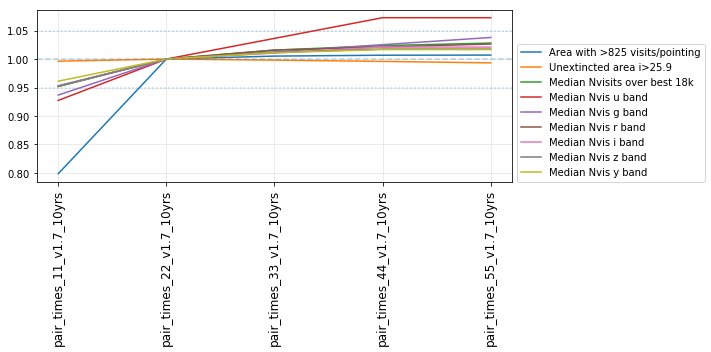

In [8]:
# And plot 
ri.plot(d)

So there are some trends. The number of visits per pointing increases as the pair time increases - and as the pair time interval drops to 11 minutes, the total number of visits per pointing drops far enough that it starts impacting the area which is covered to >825 visits per pointing. 
There is also a somewhat uneven shift in the filter balance (*u* band visits per pointing increases a little more than the other bands), but it's not a very large difference.

### Is this due to filter changes?

So let's investigate a little more. Because we change filter when we come back for the second visit in a pair (mixed filter pairs are the default), a shorter pair cycle means more filter changes -- and filter changes are slow. 
Let's check that this is what's happening.

In [9]:
# First let's pull out all the metrics from the summary statistics for these runs (this is a lot)
# we can then use this to get the names of the metrics we want (if we didn't know them already). 

d = families.summaries.loc[families.family[f]]
print(d.shape, '5 runs with 5991 summary metrics!')

(5, 5991) 5 runs with 5991 summary metrics!


In [10]:
# Pull out the filter change metric summaries -- we can see above that the number of visits increases.
metrics = [m for m in d.keys() if 'Filter' in m and ("Whole" in m or "Mean" in m or "Median" in m)]
# and slew times
metrics += [m for m in d.keys() if 'slewTime' in m and ('Mean' in m or 'Median' in m)]
# Pull out the number of visits metric (whole survey and per pointing)
metrics += ['Nvisits All', 'Median NVisits all bands HealpixSlicer']
metrics

['Filter Changes Whole Survey',
 'Mean Filter Changes Per Night OneDSlicer',
 'Median Filter Changes Per Night OneDSlicer',
 'Mean slewTime All visits',
 'Median slewTime All visits',
 'Nvisits All',
 'Median NVisits all bands HealpixSlicer']

In [11]:
# Now we can look at just the columns with the metrics we're interested in:
d[metrics]

,Filter Changes Whole Survey,Mean Filter Changes Per Night OneDSlicer,Median Filter Changes Per Night OneDSlicer,Mean slewTime All visits,Median slewTime All visits,Nvisits All,Median NVisits all bands HealpixSlicer
pair_times_11_v1.7_10yrs,68291.0,23.319957,24.0,10.490746,5.047193,1947985.0,828.0
pair_times_22_v1.7_10yrs,38177.0,12.625355,13.0,8.371239,4.936006,2045493.0,870.0
pair_times_33_v1.7_10yrs,30071.0,9.751065,10.0,7.758801,4.889790,2075493.0,884.0
pair_times_44_v1.7_10yrs,26452.0,8.465554,8.0,7.468467,4.873816,2089977.0,890.0
pair_times_55_v1.7_10yrs,23824.0,7.534446,7.0,7.263802,4.858895,2100189.0,894.0


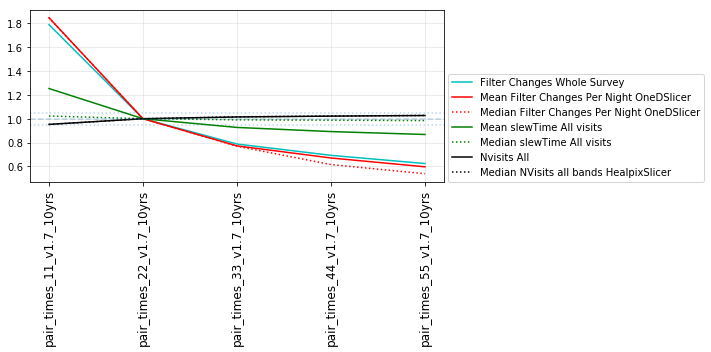

In [12]:
# We can then normalize these and plot them too

normdf = ri.norm_df(d[metrics], comparison_run)

ri.plot(normdf, style=['c-', 'r-', 'r:', 'g-', 'g:', 'k-', 'k:'])

We can see a large change in the number of filter changes in the whole survey which closely tracks the number of filter changes per night, and generally matches what we had expected for decreasing pair cycle time (shorter pairs = more filter changes).  
This is also tied to a less dramatic increase in the mean slew time, as filter changes are included in slew times.
And slew times are necessarily linked to the number of visits per night; so this makes sense.

### Impact on science metrics

Of course, we are interested in the impact on science metrics. 
We've also put together a dictionary containing names of some of the science metrics (the ones we looked at in PTSN-051 primarily). This dictionary can be useful here too.

In [13]:
# import pre-made metrics dictionaries
import metric_infos as mi

In [14]:
# Example of the coordinated sets of metrics:
mi.metrics.keys()

dict_keys(['srd', 'Nvis', 'cadence', 'tvs', 'descWFD', 'galaxies', 'sso'])

In [15]:
# Let's check SRD impacts
comparison_run = families.family_baseline[f]
d = families.summaries.loc[families.family[f]]
d_srd = d[mi.metrics['srd']]
d_srd

,fONv MedianNvis fO All visits HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 22.4 All visits HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 24.0 All visits HealpixSlicer,Median Proper Motion Error (18k) Proper Motion Error @ 20.5 All visits HealpixSlicer,Median Proper Motion Error (18k) Proper Motion Error @ 24.0 All visits HealpixSlicer
pair_times_11_v1.7_10yrs,845.0,2.291775,9.270557,0.184953,2.196836
pair_times_22_v1.7_10yrs,888.0,2.308441,9.325001,0.181738,2.178100
pair_times_33_v1.7_10yrs,902.0,2.325616,9.415778,0.181901,2.196481
pair_times_44_v1.7_10yrs,909.0,2.343756,9.538031,0.182231,2.224443
pair_times_55_v1.7_10yrs,913.0,2.344833,9.523435,0.182843,2.231259


In [16]:
# Normalize dataframe -- metric_infos comes with dictionaries on which columns to invert or are magnitudes
normdf = ri.norm_df(d_srd, comparison_run, 
                    invert_cols=mi.invert_cols['srd'], mag_cols=mi.mag_cols['srd'])
# Rename the columns something easier to read (and appropriate for normalization)
normdf.columns = mi.short_names_norm['srd']
normdf

,fONv MedianNvis,1 / Med Parallax Error @22.4,1 / Med Parallax Error @24.0,1 / Med PM Error @20.5,1 /Med PM Error @24.0
pair_times_11_v1.7_10yrs,0.951577,1.007272,1.005873,0.982619,0.991471
pair_times_22_v1.7_10yrs,1.000000,1.000000,1.000000,1.000000,1.000000
pair_times_33_v1.7_10yrs,1.015766,0.992615,0.990359,0.999103,0.991631
pair_times_44_v1.7_10yrs,1.023649,0.984932,0.977665,0.997294,0.979167
pair_times_55_v1.7_10yrs,1.028153,0.984480,0.979164,0.993956,0.976175


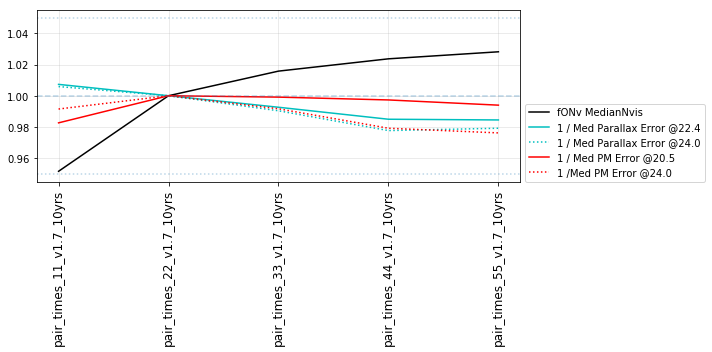

In [17]:
# Plot
ri.plot(normdf, style=mi.styles['srd'])

This more or less tracks as we'd expected. More visits = better SRD metrics. The parallax error is an outlier in this, but only by a small amount. 

#### SSO completeness 
Let's check the impact on solar system completeness though, as pairs are very important for this purpose. 

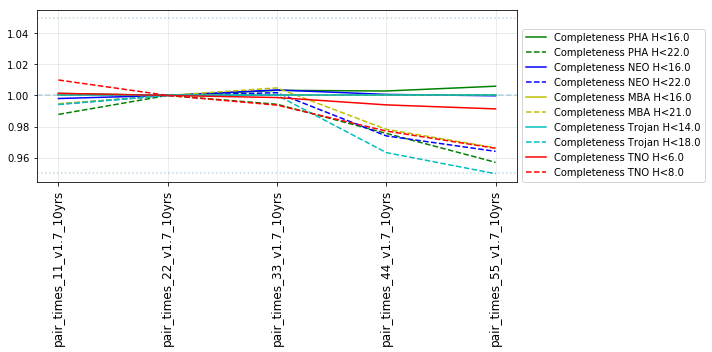

In [18]:
k = 'sso'
df = d[mi.metrics[k]]
normdf = ri.norm_df(df, comparison_run, invert_cols=mi.invert_cols[k], mag_cols=mi.mag_cols[k])
normdf.columns = mi.short_names_norm[k]

ri.plot(normdf, style=mi.styles[k])

While the short pairs add only a slight impact (which is partly due to an issue in the metric - it doesn't exclude pairs of detections within a night which show no motion, and so would not actually be detected in the moving object pipelines). But the longer pair times show a fairly large decrease, particularly for Trojan asteroids. 

What's going on? Let's check the pairs .. 

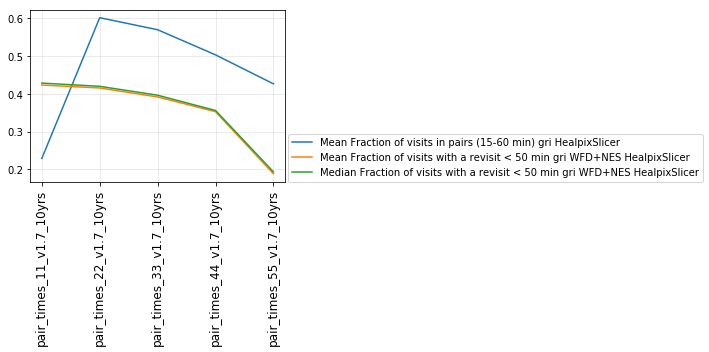

In [19]:
metrics = ['Mean Fraction of visits in pairs (15-60 min) gri HealpixSlicer',
           'Mean Fraction of visits with a revisit < 50 min gri WFD+NES HealpixSlicer',
          'Median Fraction of visits with a revisit < 50 min gri WFD+NES HealpixSlicer']
ri.plot(d[metrics], normed=False)

Some of these drops are understandable -- the first metric is not sensitive to pairs < 15 minutes apart, and the second metric is not sensitive to pairs > 50 minutes apart. They also measure slightly different things regarding 'what is a pair', but they are complementary. 

Both of them are showing that as the pair interval gets longer, the fraction of visits that are in pairs drops. 
Looking into some examples in the sqlite file, this seems to be because as the pair time gets longer, the pairs are more vulnerable to interruptions (from weather, primarily). 

There does seem to be a sweet spot here though -- 33 minute pairs result in a small increase in the number of visits overall (which is good for everyone) without impacting solar system science significantly.

#### Check all the science metrics

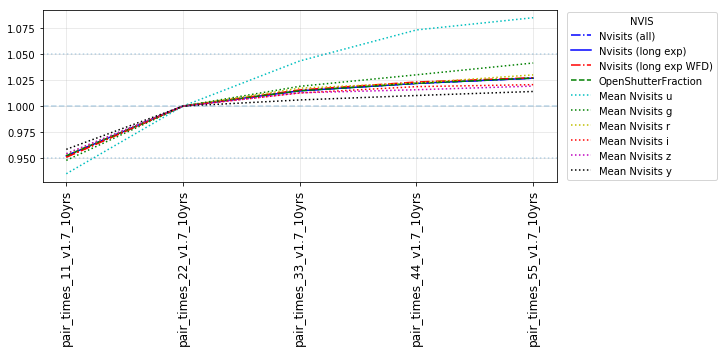

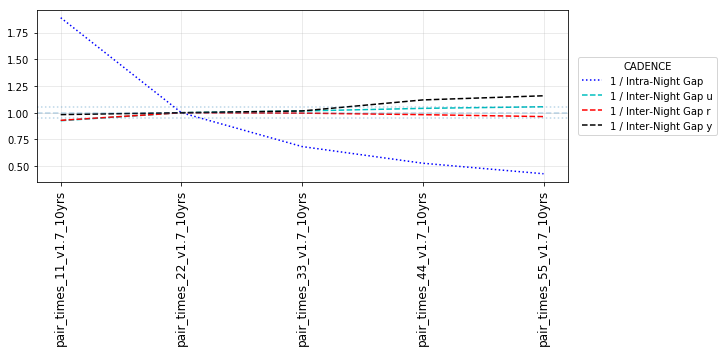

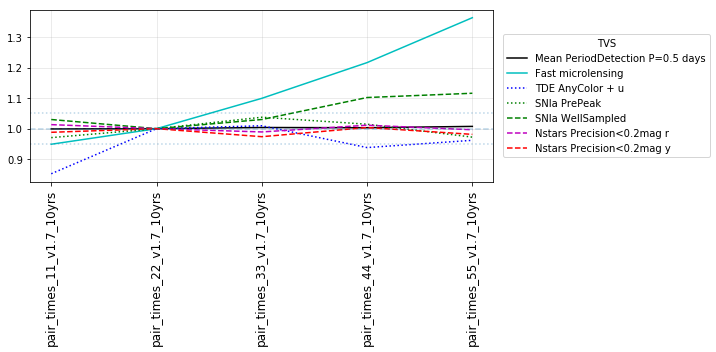

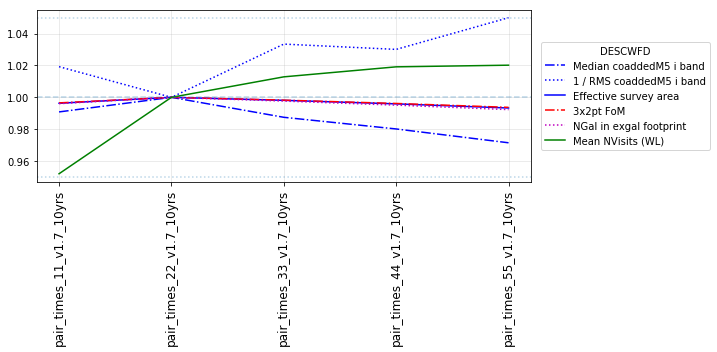

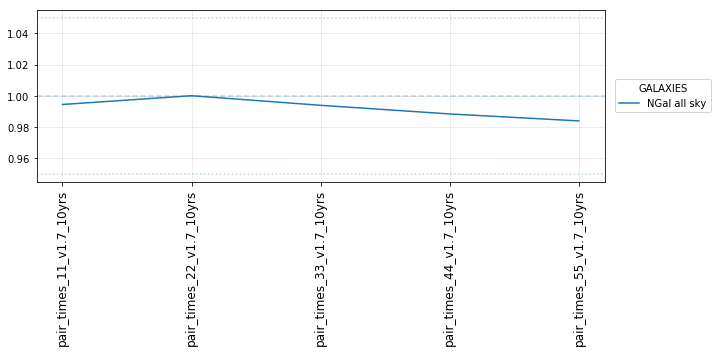

In [21]:
# We can cycle through and check for impacts on other science .. 
for k in mi.metrics:
    if k == 'srd' or k == 'sso': 
        continue
    df = d[mi.metrics[k]]
    normdf = ri.norm_df(df, comparison_run, 
                       invert_cols=mi.invert_cols[k], mag_cols=mi.mag_cols[k])
    normdf.columns = mi.short_names_norm[k]
    ri.plot(normdf, style=mi.styles[k])
    plt.legend(loc='center left', bbox_to_anchor=(1.01, 0., .9, 1), fancybox=True,
               title=f'{k.upper()}')


So 33 minute pairs, instead of 22 minute pairs, does seem to be having a slight impact on the coadded i band depth - but otherwise looks good. The i band depths vary by a small amount:

In [28]:
# check i-band coadded depths per pointing
metrics = [m for m in d.keys() if 'CoaddM5 i band' in m and 'Median' in m]
d[metrics]

,Median CoaddM5 i band HealpixSlicer
pair_times_11_v1.7_10yrs,26.311449
pair_times_22_v1.7_10yrs,26.320644
pair_times_33_v1.7_10yrs,26.310639
pair_times_44_v1.7_10yrs,26.300172
pair_times_55_v1.7_10yrs,26.293219


### Conclusions 

So overall:  going to 33 minute pairs from 22 minutes (the baseline default) results in 1.5% more visits per pointing (2% over the WFD area), minimal impact on solar system completeness, a slight 0.01 magnitude decrease in coadded i band depth, an increase in *u* band visits, and a small boost in fast microlensing detections (perhaps due to more *u* band images, but perhaps due to better timing). 

Going to much shorter (11 minute) pairs results in significantly fewer visits.
Going to much longer (44 or 55 minute) pairs results in many more interrupted pairs and a significant drop in solar system completeness. 

My thoughts: there is a slight benefit to 33 minute pairs and we should likely adopt that as the new default in the scheduler (and check into what caused the slight *i* band depth drop.